In [1]:
!pip install kaggle
!pip install pandas
!pip install sklearn
!pip install tensorflow
!pip install scikit-image
!pip install keras

     |████████████████████████████████| 59 kB 3.5 MB/s eta 0:00:011
     |████████████████████████████████| 74 kB 2.1 MB/s eta 0:00:011
     |████████████████████████████████| 58 kB 6.9 MB/s  eta 0:00:01
     |████████████████████████████████| 78 kB 5.6 MB/s eta 0:00:011
  Created wheel for kaggle: filename=kaggle-1.5.10-py3-none-any.whl size=73268 sha256=fe1a2c914795315fde7583b769aaa88df09f39c029d5ffd78d9019969be0e6e9
  Stored in directory: /root/.cache/pip/wheels/1c/dd/dd/c493e6f981182c1411e288c553310f76e212bac3afbdac1294
  Created wheel for python-slugify: filename=python_slugify-4.0.1-py2.py3-none-any.whl size=6769 sha256=21dd090aee733286eeee7148244f09b369596b131a1b75b50c07e549031458f1
  Stored in directory: /root/.cache/pip/wheels/72/e6/db/122611605e60148f54ee2abaca98b2bbeafc6e22486a867bad
Successfully built kaggle python-slugify
  Attempting uninstall: idna
    Found existing installation: idna 3.1
    Uninstalling idna-3.1:
      Successfully uninstalled idna-3.1
You should cons

In [2]:
!mkdir -p /root/.kaggle
!cp kaggle.json /root/.kaggle
!ls /root/.kaggle

kaggle.json


In [3]:
!kaggle datasets list -s mrkhan17

ref                       title            size  lastUpdated          downloadCount  voteCount  usabilityRating  
------------------------  ---------------  ----  -------------------  -------------  ---------  ---------------  
mrkhan17/kvasir-version2  kvasir version2   1GB  2021-01-29 17:55:36             41          1  0.125            
mrkhan17/hyperkvasir      hyper-kvasir      4GB  2021-02-18 19:03:49             20          0  0.11764706       


In [4]:
#run the folloiwng code only for the firts time
!kaggle datasets download mrkhan17/hyperkvasir

100%|█████████████████████████████████████▉| 3.66G/3.66G [02:49<00:00, 13.4MB/s]
100%|██████████████████████████████████████| 3.66G/3.66G [02:49<00:00, 23.2MB/s]


In [5]:
#run the folloiwng code only for the firts time
!unzip -q hyperkvasir.zip -d hyperkvasir

In [6]:
#run the folloiwng code only for the firts time
!rm -r hyperkvasir.zip

## Read and show images as matrix and as a picture

In [1]:
from __future__ import division, print_function, unicode_literals

In [2]:
import os
import pandas as pd
from skimage.transform import resize
import keras
import numpy as np
from keras.preprocessing import image
from PIL import Image
import matplotlib.pyplot as plt

hyperkvasir/labeled-images/lower-gi-tract/anatomical-landmarks/cecum


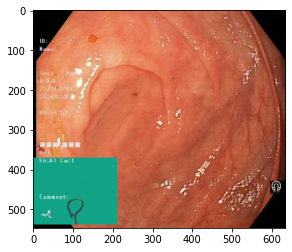

In [9]:
categories = ['hyperkvasir/labeled-images/lower-gi-tract/anatomical-landmarks/cecum',
              'hyperkvasir/labeled-images/lower-gi-tract/anatomical-landmarks/ileum',
              'hyperkvasir/labeled-images/lower-gi-tract/anatomical-landmarks/retroflex-rectum',
              'hyperkvasir/labeled-images/lower-gi-tract/pathological-findings/hemorrhoids',
             'hyperkvasir/labeled-images/lower-gi-tract/pathological-findings/polyps',
             'hyperkvasir/labeled-images/lower-gi-tract/pathological-findings/ulcerative-colitis-grade-0-1',
             'hyperkvasir/labeled-images/lower-gi-tract/pathological-findings/ulcerative-colitis-grade-1',
             'hyperkvasir/labeled-images/lower-gi-tract/pathological-findings/ulcerative-colitis-grade-1-2',
             'hyperkvasir/labeled-images/lower-gi-tract/pathological-findings/ulcerative-colitis-grade-2',
             'hyperkvasir/labeled-images/lower-gi-tract/pathological-findings/ulcerative-colitis-grade-2-3',
             'hyperkvasir/labeled-images/lower-gi-tract/pathological-findings/ulcerative-colitis-grade-3',
             'hyperkvasir/labeled-images/lower-gi-tract/quality-of-mucosal-views/bbps-0-1',
             'hyperkvasir/labeled-images/lower-gi-tract/quality-of-mucosal-views/bbps-2-3',
             'hyperkvasir/labeled-images/lower-gi-tract/quality-of-mucosal-views/impacted-stool',
             'hyperkvasir/labeled-images/lower-gi-tract/therapeutic-interventions/dyed-lifted-polyps',
             'hyperkvasir/labeled-images/lower-gi-tract/therapeutic-interventions/dyed-resection-margins',
             'hyperkvasir/labeled-images/upper-gi-tract/anatomical-landmarks/pylorus',
             'hyperkvasir/labeled-images/upper-gi-tract/anatomical-landmarks/retroflex-stomach',
             'hyperkvasir/labeled-images/upper-gi-tract/anatomical-landmarks/z-line',
             'hyperkvasir/labeled-images/upper-gi-tract/pathological-findings/barretts',
             'hyperkvasir/labeled-images/upper-gi-tract/pathological-findings/barretts-short-segment',
             'hyperkvasir/labeled-images/upper-gi-tract/pathological-findings/esophagitis-a',
             'hyperkvasir/labeled-images/upper-gi-tract/pathological-findings/esophagitis-b-d']
for category in categories:
    path= os.path.join(category)
    for img in os.listdir(path):
        img_array = plt.imread(os.path.join(path,img),'RGB')   
        print(path)
        plt.imshow(img_array)
        plt.show()
        break
    break

In [10]:
print(img_array.shape)

(547, 635, 3)


In [11]:
print(img_array.T[0].shape)
print(img_array.T[0])

(635, 547)
[[6 3 3 ... 0 0 1]
 [4 3 3 ... 1 0 1]
 [4 3 4 ... 1 1 1]
 ...
 [3 4 3 ... 1 0 1]
 [3 4 3 ... 1 0 1]
 [3 4 3 ... 1 0 1]]


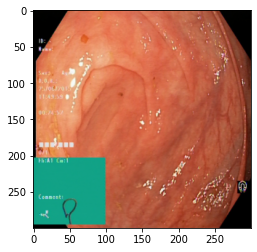

In [12]:
img_size = 300
new_array = resize(img_array, (img_size, img_size))
plt.imshow(new_array)
plt.show()

## Save images as a matrix

In [13]:
labeled_data = []
label_name = {}
def image_to_matrix():
    for category in categories:
        path= os.path.join(category)
        class_num = categories.index(category)
        label_name[category] = class_num
        for img in os.listdir(path):
            try:
                img_array= plt.imread(os.path.join(path,img),  'RGB')
                new_array = resize(img_array, (img_size, img_size))
                labeled_data.append([new_array, class_num])
            except Exception as e:
                pass
            
image_to_matrix()

## Split labeled data to train and test sets

In [14]:
import random 
random.shuffle(labeled_data)
X = []
y = []
for features, label in labeled_data:
    X.append(features)
    y.append(label)
    
X = np.array(X).reshape(-1, img_size, img_size,3)


In [15]:
print(X.shape, np.shape(y))

(10662, 300, 300, 3) (10662,)


In [16]:
Y = np.array(y).reshape((-1,1))

In [19]:
Y = to_categorical(np.asarray(Y))

In [20]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.15,random_state=42)

In [21]:
print(x_train.shape,x_test.shape)
print(y_train.shape, y_test.shape)

(9062, 300, 300, 3) (1600, 300, 300, 3)
(9062, 23) (1600, 23)


In [22]:
print(x_train.min(), x_train.max())

0.0 1.0


# Main Part

In [4]:
from __future__ import print_function
from keras import backend as K
from keras import activations
from keras import utils
from keras.models import Model
from keras.layers import *
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.vgg16 import VGG16, preprocess_input
from keras.optimizers import RMSprop, Adam, SGD, Nadam
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau, ModelCheckpoint, EarlyStopping
from keras import regularizers
from tensorflow.keras.utils import to_categorical
import tensorflow as tf
import gc
from keras import callbacks
#from sklearn.model_selection import KFold, StratifiedKFold


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

IMG_SIZE = 300

In [23]:
def squash(x, axis=-1):
    s_squared_norm = K.sum(K.square(x), axis, keepdims=True) + K.epsilon()
    scale = K.sqrt(s_squared_norm) / (0.5 + s_squared_norm)
    return scale * x

In [24]:
def softmax(x, axis=-1):
    ex = K.exp(x - K.max(x, axis=axis, keepdims=True))
    return ex / K.sum(ex, axis=axis, keepdims=True)

In [25]:
def margin_loss(y_true, y_pred):
    lamb, margin = 0.5, 0.1 #default lambda 0.5 - but test with lambda with 0.9 - 0.1
    return K.sum(y_true * K.square(K.relu(1 - margin - y_pred)) + lamb * (
        1 - y_true) * K.square(K.relu(y_pred - margin)), axis=-1)

In [26]:
def create_submission(y_pred,y_test,path):
    result = pd.DataFrame(
        {'y_test':y_test,'y_predicted':y_pred}
        )
    result.to_csv(path, index=True)

In [5]:
input_image = Input(shape=(IMG_SIZE, IMG_SIZE, 3))


# A InceptionResNetV2 Conv2D model
base_model = VGG16(include_top=False, weights='imagenet', input_tensor=input_image)

base_model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 300, 300, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 300, 300, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 300, 300, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 150, 150, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 150, 150, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 150, 150, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 75, 75, 128)       0     

In [6]:
x = GlobalAveragePooling2D()(base_model.output)
x = Dense(4096, activation='relu')(x)
x = Dropout(0.2)(x)
output = Dense(23, activation='softmax')(x)

model = Model(inputs=input_image, outputs=output)

model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 300, 300, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 300, 300, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 300, 300, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 150, 150, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 150, 150, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 150, 150, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 75, 75, 128)       0     

## Architecture

In [8]:
import visualkeras
#visualkeras.layered_view(model, to_file='output.png').show() # write and show

visualkeras.layered_view(model, to_file='VGG16 on Hyper Kvasir.png').show() # write and show

## Data Preprocessing

In [30]:
x_train.shape, y_train.shape

((9062, 300, 300, 3), (9062, 23))

In [31]:
lr=1e-4
model.compile(loss='categorical_crossentropy', optimizer=SGD(lr=lr, momentum=0.9), metrics=['accuracy'])


In [32]:
checkpoint = ModelCheckpoint("weights_HyperKvasir_VGG16.h5", 
                             monitor='val_loss', 
                             verbose=1, 
                             save_best_only=True, 
                             save_weights_only=False, 
                             mode='min')

early = EarlyStopping(monitor='val_loss', patience=10, verbose=1, mode='min', restore_best_weights=True)

callback_list = [checkpoint, early]

In [33]:
epochs=50
k = 10
kfold = KFold(n_splits=k, shuffle=True, random_state=42)
cvscores = []
historieskv = []
Fold = 1
for train, val in kfold.split(x_train, y_train):
    gc.collect()
    K.clear_session()
    
    X_train = x_train[train]
    X_val = x_train[val]
    
    Y_train = y_train[train]
    Y_val = y_train[val]
     
    print("=========================================")
    print("====== K Fold Validation step => %d/%d =======" % (Fold,k))
    print("=========================================")

    historykv=model.fit(X_train, Y_train, 
              validation_data=(X_val, Y_val),
              epochs=epochs,
              callbacks=callback_list,verbose=1)
    historieskv.append(historykv)
    
    
    # evaluate the model
    scores = model.evaluate(X_val, Y_val, verbose=0)
    print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
    cvscores.append(scores[1] * 100)
    
    
    Fold = Fold +1

print("%s: %.2f%%" % ("Mean Accuracy of CV scores: ",np.mean(cvscores)))
print("%s: %.2f%%" % ("Standard Deviation of CV scores: +/-", np.std(cvscores)))

loss_test, acc_test = model.evaluate(x_test, y_test)

print ("\n\n================================\n\n")
print ("Loss on Test Set: {}".format(loss_test))
print ("Accuracy on Test Set: {0:.2f} %".format(acc_test * 100))
print ("\n\n================================\n\n")

====== K Fold Validation step => 1/10 =======
Epoch 1/50
255/255 [==============================] - 994s 2s/step - loss: 2.8317 - accuracy: 0.1406 - val_loss: 1.7939 - val_accuracy: 0.4135

Epoch 00001: val_loss improved from inf to 1.79389, saving model to weights_HyperKvasir_VGG16.h5
Epoch 2/50
255/255 [==============================] - 48s 189ms/step - loss: 1.4766 - accuracy: 0.5359 - val_loss: 0.9288 - val_accuracy: 0.6990

Epoch 00002: val_loss improved from 1.79389 to 0.92877, saving model to weights_HyperKvasir_VGG16.h5
Epoch 3/50
255/255 [==============================] - 49s 191ms/step - loss: 0.9131 - accuracy: 0.7012 - val_loss: 0.7056 - val_accuracy: 0.7596

Epoch 00003: val_loss improved from 0.92877 to 0.70557, saving model to weights_HyperKvasir_VGG16.h5
Epoch 4/50
255/255 [==============================] - 49s 191ms/step - loss: 0.7615 - accuracy: 0.7429 - val_loss: 0.6269 - val_accuracy: 0.7905

Epoch 00004: val_loss improved from 0.70557 to 0.62688, saving model to w

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



255/255 [==============================] - 49s 192ms/step - loss: 0.0703 - accuracy: 0.9762 - val_loss: 0.0861 - val_accuracy: 0.9636

Epoch 00006: val_loss did not improve from 0.04213
Epoch 7/50
255/255 [==============================] - 49s 192ms/step - loss: 0.0710 - accuracy: 0.9757 - val_loss: 0.0905 - val_accuracy: 0.9702

Epoch 00007: val_loss did not improve from 0.04213
Epoch 8/50
255/255 [==============================] - 49s 192ms/step - loss: 0.0784 - accuracy: 0.9746 - val_loss: 0.0863 - val_accuracy: 0.9746

Epoch 00008: val_loss did not improve from 0.04213
Epoch 9/50
255/255 [==============================] - 49s 192ms/step - loss: 0.0727 - accuracy: 0.9751 - val_loss: 0.0846 - val_accuracy: 0.9680

Epoch 00009: val_loss did not improve from 0.04213
Epoch 10/50
255/255 [==============================] - 49s 192ms/step - loss: 0.0697 - accuracy: 0.9781 - val_loss: 0.0757 - val_accuracy: 0.9724

Epoch 00010: val_loss did not improve from 0.04213
Epoch 11/50
255/255 [====

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [112]:
loss_test, acc_test = model.evaluate(x_test, y_testt)

print ("\n\n================================\n\n")
print ("Loss on Test Set: {}".format(loss_test))
print ("Accuracy on Test Set: {0:.2f} %".format(acc_test * 100))
print ("\n\n================================\n\n")

50/50 [==============================] - 3s 54ms/step - loss: 0.4684 - accuracy: 0.8819




Loss on Test Set: 0.46840766072273254
Accuracy on Test Set: 88.19 %






In [122]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import itertools

y_pred = model.predict(x_test)
y_pred = np.argmax(y_pred,axis=1)

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        title='Normalized confusion matrix of VGG16(10fold CV) on HyperKvasir'
    else:
        title='Confusion matrix of VGG16(10fold CV) on HyperKvasir'

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.figure().savefig('Confusion matrix of classes Hyper Kvasir Dataset(VGG16).png')
    plt.show()

In [115]:
import matplotlib.pyplot as plt
import numpy as np

def show_values(pc, fmt="%.2f", **kw):
    '''
    Heatmap with text in each cell with matplotlib's pyplot
    Source: https://stackoverflow.com/a/25074150/395857 
    By HYRY
    '''
    pc.update_scalarmappable()
    ax = pc.axes
    #ax = pc.axes# FOR LATEST MATPLOTLIB
    #Use zip BELOW IN PYTHON 3
    for p, color, value in zip(pc.get_paths(), pc.get_facecolors(), pc.get_array()):
        x, y = p.vertices[:-2, :].mean(0)
        if np.all(color[:3] > 0.5):
            color = (0.0, 0.0, 0.0)
        else:
            color = (1.0, 1.0, 1.0)
        ax.text(x, y, fmt % value, ha="center", va="center", color=color, **kw)


def cm2inch(*tupl):
    '''
    Specify figure size in centimeter in matplotlib
    Source: https://stackoverflow.com/a/22787457/395857
    By gns-ank
    '''
    inch = 2.54
    if type(tupl[0]) == tuple:
        return tuple(i/inch for i in tupl[0])
    else:
        return tuple(i/inch for i in tupl)


def heatmap(AUC, title, xlabel, ylabel, xticklabels, yticklabels, figure_width=40, figure_height=20, correct_orientation=False, cmap='RdBu'):
    '''
    Inspired by:
    - https://stackoverflow.com/a/16124677/395857 
    - https://stackoverflow.com/a/25074150/395857
    '''

    # Plot it out
    fig, ax = plt.subplots()    
    #c = ax.pcolor(AUC, edgecolors='k', linestyle= 'dashed', linewidths=0.2, cmap='RdBu', vmin=0.0, vmax=1.0)
    c = ax.pcolor(AUC, edgecolors='k', linestyle= 'dashed', linewidths=0.2, cmap=cmap, vmin=0.0, vmax=1.0)

    # put the major ticks at the middle of each cell
    ax.set_yticks(np.arange(AUC.shape[0]) + 0.5, minor=False)
    ax.set_xticks(np.arange(AUC.shape[1]) + 0.5, minor=False)

    # set tick labels
    #ax.set_xticklabels(np.arange(1,AUC.shape[1]+1), minor=False)
    ax.set_xticklabels(xticklabels, minor=False)
    ax.set_yticklabels(yticklabels, minor=False)

    # set title and x/y labels
    plt.title(title, y=1.25)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)      

    # Remove last blank column
    plt.xlim( (0, AUC.shape[1]) )

    # Turn off all the ticks
    ax = plt.gca()    
    for t in ax.xaxis.get_major_ticks():
        t.tick1line.set_visible(False)
        t.tick2line.set_visible(False)
    for t in ax.yaxis.get_major_ticks():
        t.tick1line.set_visible(False)
        t.tick2line.set_visible(False)

    # Add color bar
    plt.colorbar(c)

    # Add text in each cell 
    show_values(c)

    # Proper orientation (origin at the top left instead of bottom left)
    if correct_orientation:
        ax.invert_yaxis()
        ax.xaxis.tick_top()       

    # resize 
    fig = plt.gcf()
    #fig.set_size_inches(cm2inch(40, 20))
    #fig.set_size_inches(cm2inch(40*4, 20*4))
    fig.set_size_inches(cm2inch(figure_width, figure_height))



def plot_classification_report(classification_report, number_of_classes=2, title='Classification report ', cmap='RdYlGn'):
    '''
    Plot scikit-learn classification report.
    Extension based on https://stackoverflow.com/a/31689645/395857 
    '''
    lines = classification_report.split('\n')

    #drop initial lines
    lines = lines[2:]

    classes = []
    plotMat = []
    support = []
    class_names = []
    for line in lines[: number_of_classes]:
        t = list(filter(None, line.strip().split('  ')))
        if len(t) < 4: continue
        classes.append(t[0])
        v = [float(x) for x in t[1: len(t) - 1]]
        support.append(int(t[-1]))
        class_names.append(t[0])
        plotMat.append(v)


    xlabel = 'Metrics'
    ylabel = 'Classes'
    xticklabels = ['Precision', 'Recall', 'F1-score']
    yticklabels = ['{0} ({1})'.format(class_names[idx], sup) for idx, sup  in enumerate(support)]
    figure_width = 10
    figure_height = len(class_names) + 3
    correct_orientation = True
    heatmap(np.array(plotMat), title, xlabel, ylabel, xticklabels, yticklabels, figure_width, figure_height, correct_orientation, cmap=cmap)
    plt.show()


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<Figure size 504x864 with 0 Axes>

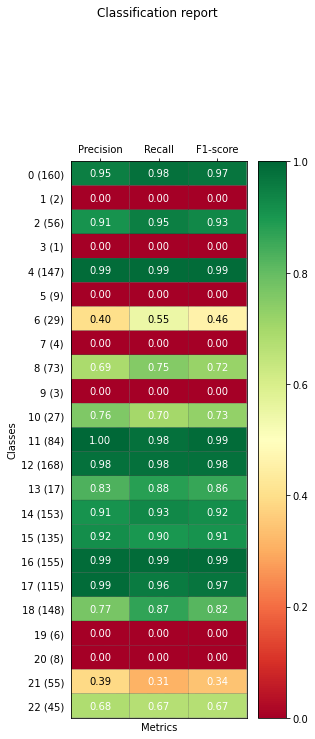

<Figure size 432x288 with 0 Axes>

In [117]:
plt.figure(figsize = (7,12))
plot_classification_report(classification_report(y_test, y_pred), 23, title='Classification report ', cmap='RdYlGn')
plt.figure().savefig('Classification report of VGG16 on HyperKvasir.png')

In [118]:
from sklearn.metrics import matthews_corrcoef
from sklearn import metrics as m
def overall_result(y_, y_predicted):
# save confusion matrix and slice into four pieces

    cnf_matrix = confusion_matrix(y_, y_predicted)
    
    
    FP = cnf_matrix.sum(axis=0) - np.diag(cnf_matrix)  
    FN = cnf_matrix.sum(axis=1) - np.diag(cnf_matrix)
    TP = np.diag(cnf_matrix)
    TN = cnf_matrix.sum() - (FP + FN + TP)

    FP = FP.astype(float)
    FN = FN.astype(float)
    TP = TP.astype(float)
    TN = TN.astype(float)
    

    # calculate accuracy
    conf_accuracy = m.accuracy_score(y_, y_predicted)

    # calculate mis-classification
    conf_misclassification = 1- conf_accuracy

    # calculate the sensitivity
    conf_sensitivity = (TP / (TP + FN))
    conf_sensitivity = np.mean(conf_sensitivity)
    
    # calculate the specificity
    conf_specificity = (TN / (TN + FP))
    conf_specificity = np.mean(conf_specificity)

    # calculate precision
    conf_precision = (TP / (TP + FP))
    conf_precision = np.nan_to_num(conf_precision)
    conf_precision = np.mean(conf_precision)
    
    # calculate f_1 score
    conf_f1 = 2 * ((conf_precision * conf_sensitivity) / (conf_precision + conf_sensitivity))

    result_s = {}
    result_s['Accuracy']           = [round(conf_accuracy,2)]
    result_s['Mis-Classification'] = [round(conf_misclassification,2)]
    result_s['Sensitivity']        = [round(conf_sensitivity,2)]
    result_s['Specificity']        = [round(conf_specificity,2)]
    result_s['Precision']          = [round(conf_precision,2)]
    result_s['F1 Score']           = [round(conf_f1,2)]
    result_s['MCC']                = [round(matthews_corrcoef(y_, y_predicted),2)]


    df_result           = pd.DataFrame(result_s)
    
    return df_result

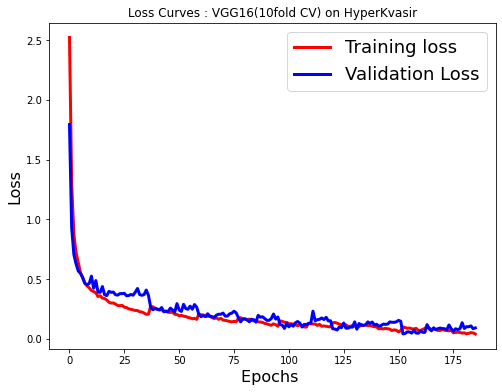

In [119]:
fig1 = plt.figure(figsize = (8,6))
plt.plot([j for i in historieskv for j in i.history['loss']],'r',linewidth=3.0)
plt.plot([j for i in historieskv for j in i.history['val_loss']],'b',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title(f'Loss Curves : VGG16(10fold CV) on HyperKvasir',fontsize=12)
fig1.savefig('loss_VGG16_on_HyperKvasir.png')
plt.show()

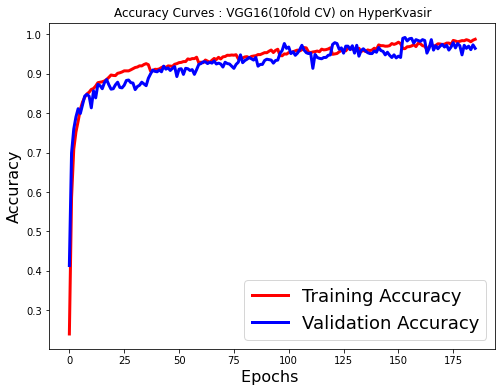

In [120]:
fig2=plt.figure(figsize = (8,6))
plt.plot([j for i in historieskv for j in i.history['accuracy']],'r',linewidth=3.0)
plt.plot([j for i in historieskv for j in i.history['val_accuracy']],'b',linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title(f'Accuracy Curves : VGG16(10fold CV) on HyperKvasir',fontsize=12)
fig2.savefig('accuracy_VGG16_on_HyperKvasir.png')
plt.show()

In [121]:
y_pred = model.predict(x_test)
y_pred = np.argmax(y_pred,axis=1)
overall_result(y_test, y_pred)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:35: RuntimeWarning: invalid value encountered in true_divide


Accuracy  Mis-Classification  Sensitivity  Specificity  Precision  \
0      0.88                0.12         0.58         0.99       0.57   

   F1 Score   MCC  
0      0.58  0.87

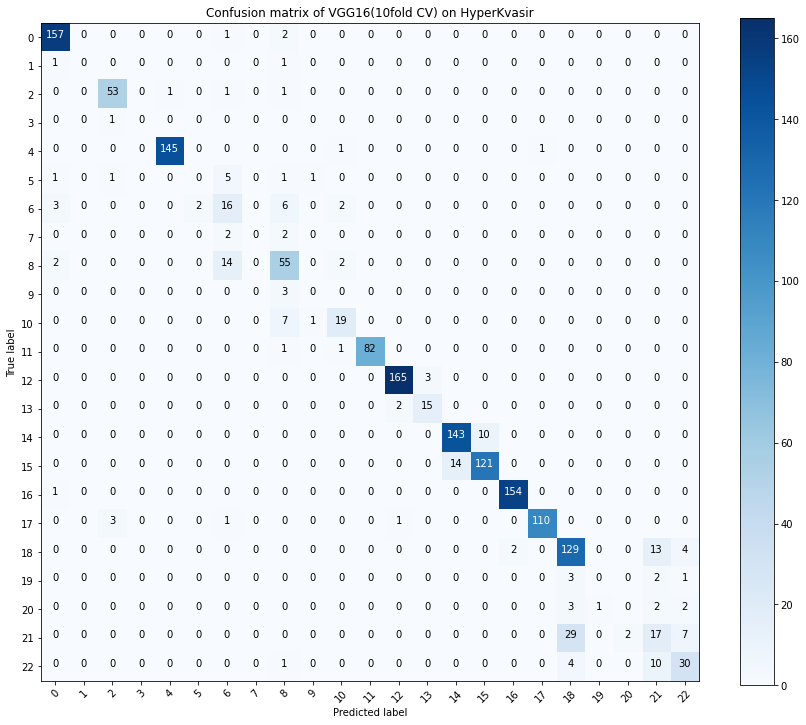

<Figure size 432x288 with 0 Axes>

In [125]:
plt.figure(figsize = (12,10))
plot_confusion_matrix(confusion_matrix(y_test, y_pred), np.arange(23),
                          normalize=False,
                          cmap=plt.cm.Blues)


# Training Hyper Kvasir dataset on VGG16+CapsNets architecture

In [34]:
class Capsule(Layer):
    def __init__(self, num_capsule, dim_capsule, routings=3, share_weights=True, activation='squash', **kwargs):
        super(Capsule, self).__init__(**kwargs)
        self.num_capsule = num_capsule
        self.dim_capsule = dim_capsule
        self.routings = routings
        self.share_weights = share_weights
        if activation == 'squash':
            self.activation = squash
        else:
            self.activation = activations.get(activation)
            
    def get_config(self):
        config = super().get_config().copy()
        config.update({
            'num_capsule': self.num_capsule, 
            'dim_capsule': self.dim_capsule, 
            'routings': self.routings, 
            'share_weights': self.share_weights 
        })
        return config

    def build(self, input_shape):
        super(Capsule, self).build(input_shape)
        input_dim_capsule = input_shape[-1]
        if self.share_weights:
            self.W = self.add_weight(name='capsule_kernel',
                                     shape=(1, input_dim_capsule,
                                            self.num_capsule * self.dim_capsule),
                                     initializer='glorot_uniform',
                                     trainable=True)
        else:
            input_num_capsule = input_shape[-2]
            self.W = self.add_weight(name='capsule_kernel',
                                     shape=(input_num_capsule,
                                            input_dim_capsule,
                                            self.num_capsule * self.dim_capsule),
                                     initializer='glorot_uniform',
                                     trainable=True)

    def call(self, u_vecs):
        if self.share_weights:
            u_hat_vecs = K.conv1d(u_vecs, self.W)
        else:
            u_hat_vecs = K.local_conv1d(u_vecs, self.W, [1], [1])

        batch_size = K.shape(u_vecs)[0]
        input_num_capsule = K.shape(u_vecs)[1]
        u_hat_vecs = K.reshape(u_hat_vecs, (batch_size, input_num_capsule,
                                            self.num_capsule, self.dim_capsule))
        u_hat_vecs = K.permute_dimensions(u_hat_vecs, (0, 2, 1, 3))
        #final u_hat_vecs.shape = [None, num_capsule, input_num_capsule, dim_capsule]

        b = K.zeros_like(u_hat_vecs[:,:,:,0]) #shape = [None, num_capsule, input_num_capsule]
        for i in range(self.routings):
            c = softmax(b, 1)
            #o = tf.matmul(c, u_hat_vecs, [2, 2])
            o = tf.einsum('bin,binj->bij', c, u_hat_vecs)
            if K.backend() == 'theano':
                o = K.sum(o, axis=1)
            if i < self.routings - 1:
                o = K.l2_normalize(o, -1)
                #b = tf.matmul(o, u_hat_vecs, [2, 3])
                b = tf.einsum('bij,binj->bin', o, u_hat_vecs)
                if K.backend() == 'theano':
                    b = K.sum(b, axis=1)

        return self.activation(o)

    def compute_output_shape(self, input_shape):
        return (None, self.num_capsule, self.dim_capsule)

In [35]:
IMG_SIZE=300

In [36]:
input_image = Input(shape=(IMG_SIZE, IMG_SIZE, 3))
# A InceptionResNetV2 Conv2D model
base_model = VGG16(include_top=False, weights='imagenet', input_tensor=input_image)

base_model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 300, 300, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 300, 300, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 300, 300, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 150, 150, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 150, 150, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 150, 150, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 75, 75, 128)       0     

In [37]:
lr=1e-4
output = Conv2D(256, kernel_size=(9, 9), strides=(1, 1), activation='relu')(base_model.get_layer(name='block5_pool').output)

x = Reshape((-1, 256))(output)
capsule = Capsule(23, 16, 4, True)(x)
capsule = Dropout(0.2)(capsule)
output = Lambda(lambda z: K.sqrt(K.sum(K.square(z), 2)))(capsule)
model2 = Model(inputs=input_image, outputs=output)

model2.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 300, 300, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 300, 300, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 300, 300, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 150, 150, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 150, 150, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 150, 150, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 75, 75, 128)       0     

In [38]:
checkpoint = ModelCheckpoint("weights_HyperKvasir_VGG16_CasNets.h5", 
                             monitor='val_loss', 
                             verbose=1, 
                             save_best_only=True, 
                             save_weights_only=False, 
                             mode='min')

early = EarlyStopping(monitor='val_loss', patience=10, verbose=0, mode='min', restore_best_weights=True)

callback_list = [checkpoint, early]

In [39]:
epochs=50

model2.compile(loss=margin_loss, optimizer=SGD(lr=lr, momentum=0.9), metrics=['accuracy'])

In [40]:
k = 10
kfold = KFold(n_splits=k, shuffle=True, random_state=42)
cvscores = []
historieshp = []
Fold = 1
for train, val in kfold.split(x_train, y_train):
    gc.collect()
    K.clear_session()
    
    X_train = x_train[train]
    X_val = x_train[val]
    
    Y_train = y_train[train]
    Y_val = y_train[val]
     
    print("=========================================")
    print("====== K Fold Validation step => %d/%d =======" % (Fold,k))
    print("=========================================")

    historyhp=model2.fit(X_train, Y_train, 
              validation_data=(X_val, Y_val),
              epochs=epochs,
              callbacks=callback_list,verbose=1)
    historieshp.append(historyhp)
    
    
    # evaluate the model
    scores = model2.evaluate(X_val, Y_val, verbose=0)
    print("%s: %.2f%%" % (model2.metrics_names[1], scores[1]*100))
    cvscores.append(scores[1] * 100)
    
    
    Fold = Fold +1

print("%s: %.2f%%" % ("Mean Accuracy of CV scores: ",np.mean(cvscores)))
print("%s: %.2f%%" % ("Standard Deviation of CV scores: +/-", np.std(cvscores)))

loss_test, acc_test = model2.evaluate(x_test, y_test)

print ("\n\n================================\n\n")
print ("Loss on Test Set: {}".format(loss_test))
print ("Accuracy on Test Set: {0:.2f} %".format(acc_test * 100))
print ("\n\n================================\n\n")

====== K Fold Validation step => 1/10 =======
Epoch 1/50
255/255 [==============================] - 248s 651ms/step - loss: 0.6088 - accuracy: 0.2651 - val_loss: 0.2831 - val_accuracy: 0.6428

Epoch 00001: val_loss improved from inf to 0.28308, saving model to weights_HyperKvasir_VGG16_CasNets.h5
Epoch 2/50
255/255 [==============================] - 50s 195ms/step - loss: 0.2438 - accuracy: 0.6934 - val_loss: 0.1973 - val_accuracy: 0.7365

Epoch 00002: val_loss improved from 0.28308 to 0.19735, saving model to weights_HyperKvasir_VGG16_CasNets.h5
Epoch 3/50
255/255 [==============================] - 50s 197ms/step - loss: 0.1691 - accuracy: 0.7828 - val_loss: 0.1712 - val_accuracy: 0.7630

Epoch 00003: val_loss improved from 0.19735 to 0.17122, saving model to weights_HyperKvasir_VGG16_CasNets.h5
Epoch 4/50
255/255 [==============================] - 50s 198ms/step - loss: 0.1406 - accuracy: 0.8260 - val_loss: 0.1522 - val_accuracy: 0.8026

Epoch 00004: val_loss improved from 0.17122 to

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



255/255 [==============================] - 50s 197ms/step - loss: 0.0198 - accuracy: 0.9852 - val_loss: 0.0370 - val_accuracy: 0.9603

Epoch 00006: val_loss did not improve from 0.03228
Epoch 7/50
255/255 [==============================] - 50s 197ms/step - loss: 0.0163 - accuracy: 0.9892 - val_loss: 0.0381 - val_accuracy: 0.9680

Epoch 00007: val_loss did not improve from 0.03228
Epoch 8/50
255/255 [==============================] - 50s 197ms/step - loss: 0.0154 - accuracy: 0.9912 - val_loss: 0.0342 - val_accuracy: 0.9647

Epoch 00008: val_loss did not improve from 0.03228
Epoch 9/50
255/255 [==============================] - 50s 197ms/step - loss: 0.0133 - accuracy: 0.9913 - val_loss: 0.0382 - val_accuracy: 0.9669

Epoch 00009: val_loss did not improve from 0.03228
Epoch 10/50
255/255 [==============================] - 50s 197ms/step - loss: 0.0116 - accuracy: 0.9931 - val_loss: 0.0392 - val_accuracy: 0.9603

Epoch 00010: val_loss did not improve from 0.03228
Epoch 11/50
255/255 [====

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



255/255 [==============================] - 50s 198ms/step - loss: 0.0139 - accuracy: 0.9922 - val_loss: 0.0091 - val_accuracy: 0.9967

Epoch 00001: val_loss improved from 0.01333 to 0.00907, saving model to weights_HyperKvasir_VGG16_CasNets.h5
Epoch 2/50
255/255 [==============================] - 50s 197ms/step - loss: 0.0126 - accuracy: 0.9925 - val_loss: 0.0099 - val_accuracy: 0.9945

Epoch 00002: val_loss did not improve from 0.00907
Epoch 3/50
255/255 [==============================] - 50s 197ms/step - loss: 0.0119 - accuracy: 0.9919 - val_loss: 0.0095 - val_accuracy: 0.9967

Epoch 00003: val_loss did not improve from 0.00907
Epoch 4/50
255/255 [==============================] - 50s 197ms/step - loss: 0.0106 - accuracy: 0.9936 - val_loss: 0.0106 - val_accuracy: 0.9934

Epoch 00004: val_loss did not improve from 0.00907
Epoch 5/50
255/255 [==============================] - 50s 197ms/step - loss: 0.0097 - accuracy: 0.9937 - val_loss: 0.0096 - val_accuracy: 0.9967

Epoch 00005: val_lo

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



255/255 [==============================] - 50s 197ms/step - loss: 0.0061 - accuracy: 0.9963 - val_loss: 0.0079 - val_accuracy: 0.9956

Epoch 00006: val_loss did not improve from 0.00681
Epoch 7/50
255/255 [==============================] - 50s 197ms/step - loss: 0.0060 - accuracy: 0.9962 - val_loss: 0.0083 - val_accuracy: 0.9956

Epoch 00007: val_loss did not improve from 0.00681
Epoch 8/50
255/255 [==============================] - 50s 197ms/step - loss: 0.0053 - accuracy: 0.9961 - val_loss: 0.0086 - val_accuracy: 0.9945

Epoch 00008: val_loss did not improve from 0.00681
Epoch 9/50
255/255 [==============================] - 50s 197ms/step - loss: 0.0054 - accuracy: 0.9963 - val_loss: 0.0081 - val_accuracy: 0.9956

Epoch 00009: val_loss did not improve from 0.00681
Epoch 10/50
255/255 [==============================] - 50s 197ms/step - loss: 0.0055 - accuracy: 0.9960 - val_loss: 0.0089 - val_accuracy: 0.9945

Epoch 00010: val_loss did not improve from 0.00681
Epoch 11/50
255/255 [====

In [103]:
y_testt = np.array(pd.get_dummies(y_test)).astype(float)
y_testt

array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [104]:
loss_test, acc_test = model2.evaluate(x_test, y_testt)

print ("\n\n================================\n\n")
print ("Loss on Test Set: {}".format(loss_test))
print ("Accuracy on Test Set: {0:.2f} %".format(acc_test * 100))
print ("\n\n================================\n\n")

50/50 [==============================] - 3s 56ms/step - loss: 0.1246 - accuracy: 0.8475




Loss on Test Set: 0.12458738684654236
Accuracy on Test Set: 84.75 %






In [126]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import itertools

y_pred = model2.predict(x_test)
y_pred = np.argmax(y_pred,axis=1)

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        title='Normalized confusion matrix of VGG16+CapsNets(10fold CV) on HyperKvasir'
    else:
        title='Confusion matrix of VGG16+CapsNets(10fold CV) on HyperKvasir'

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.figure().savefig('Confusion matrix of classes Hyper Kvasir Dataset(VGG16+CapsNets).png')
    plt.show()

In [127]:
from sklearn.metrics import matthews_corrcoef
def overall_result(y_, y_predicted):
# save confusion matrix and slice into four pieces

    cnf_matrix = confusion_matrix(y_, y_predicted)
    
    
    FP = cnf_matrix.sum(axis=0) - np.diag(cnf_matrix)  
    FN = cnf_matrix.sum(axis=1) - np.diag(cnf_matrix)
    TP = np.diag(cnf_matrix)
    TN = cnf_matrix.sum() - (FP + FN + TP)

    FP = FP.astype(float)
    FN = FN.astype(float)
    TP = TP.astype(float)
    TN = TN.astype(float)
    

    # calculate accuracy
    conf_accuracy = m.accuracy_score(y_, y_predicted)

    # calculate mis-classification
    conf_misclassification = 1- conf_accuracy

    # calculate the sensitivity
    conf_sensitivity = (TP / (TP + FN))
    conf_sensitivity = np.mean(conf_sensitivity)
    
    # calculate the specificity
    conf_specificity = (TN / (TN + FP))
    conf_specificity = np.mean(conf_specificity)

    # calculate precision
    conf_precision = (TP / (TP + FP))
    conf_precision = np.nan_to_num(conf_precision)
    conf_precision = np.mean(conf_precision)
    
    # calculate f_1 score
    conf_f1 = 2 * ((conf_precision * conf_sensitivity) / (conf_precision + conf_sensitivity))

    result_s = {}
    result_s['Accuracy']           = [round(conf_accuracy,2)]
    result_s['Mis-Classification'] = [round(conf_misclassification,2)]
    result_s['Sensitivity']        = [round(conf_sensitivity,2)]
    result_s['Specificity']        = [round(conf_specificity,2)]
    result_s['Precision']          = [round(conf_precision,2)]
    result_s['F1 Score']           = [round(conf_f1,2)]
    result_s['MCC']                = [round(matthews_corrcoef(y_, y_predicted),2)]


    df_result           = pd.DataFrame(result_s)
    
    return df_result

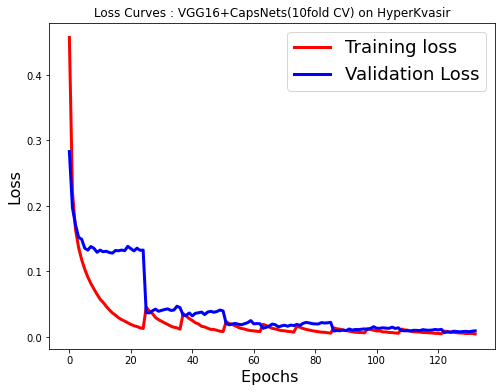

In [128]:
fig1 = plt.figure(figsize = (8,6))
plt.plot([j for i in historieshp for j in i.history['loss']],'r',linewidth=3.0)
plt.plot([j for i in historieshp for j in i.history['val_loss']],'b',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves : VGG16+CapsNets(10fold CV) on HyperKvasir',fontsize=12)
fig1.savefig('loss_VGG16_on_Kvasir.png')
plt.show()

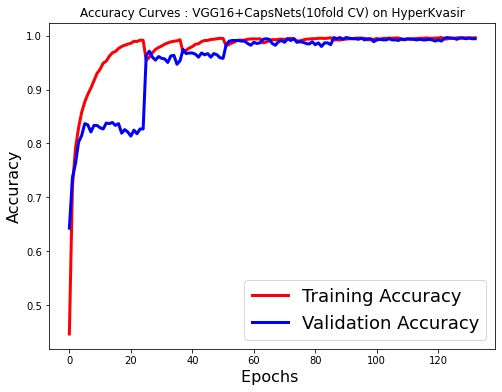

In [129]:
fig2=plt.figure(figsize = (8,6))
plt.plot([j for i in historieshp for j in i.history['accuracy']],'r',linewidth=3.0)
plt.plot([j for i in historieshp for j in i.history['val_accuracy']],'b',linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title(f'Accuracy Curves : VGG16+CapsNets(10fold CV) on HyperKvasir',fontsize=12)
fig2.savefig('accuracy_VGG16_on_Kvasir.png')
plt.show()

In [130]:
y_pred = model2.predict(x_test)
y_pred = np.argmax(y_pred,axis=1)
overall_result(y_test, y_pred)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:34: RuntimeWarning: invalid value encountered in true_divide


Accuracy  Mis-Classification  Sensitivity  Specificity  Precision  \
0      0.85                0.15         0.55         0.99       0.54   

   F1 Score   MCC  
0      0.55  0.83

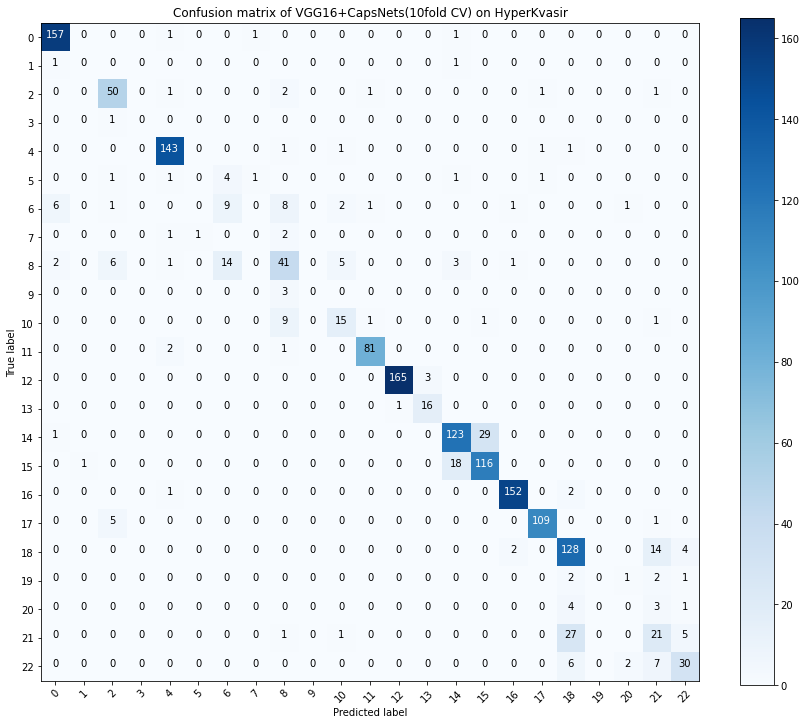

<Figure size 432x288 with 0 Axes>

In [131]:
plt.figure(figsize = (12,10))
plot_confusion_matrix(confusion_matrix(y_test, y_pred), np.arange(23),
                          normalize=False,
                          cmap=plt.cm.Blues)


In [132]:
import matplotlib.pyplot as plt
import numpy as np

def show_values(pc, fmt="%.2f", **kw):
    '''
    Heatmap with text in each cell with matplotlib's pyplot
    Source: https://stackoverflow.com/a/25074150/395857 
    By HYRY
    '''
    pc.update_scalarmappable()
    ax = pc.axes
    #ax = pc.axes# FOR LATEST MATPLOTLIB
    #Use zip BELOW IN PYTHON 3
    for p, color, value in zip(pc.get_paths(), pc.get_facecolors(), pc.get_array()):
        x, y = p.vertices[:-2, :].mean(0)
        if np.all(color[:3] > 0.5):
            color = (0.0, 0.0, 0.0)
        else:
            color = (1.0, 1.0, 1.0)
        ax.text(x, y, fmt % value, ha="center", va="center", color=color, **kw)


def cm2inch(*tupl):
    '''
    Specify figure size in centimeter in matplotlib
    Source: https://stackoverflow.com/a/22787457/395857
    By gns-ank
    '''
    inch = 2.54
    if type(tupl[0]) == tuple:
        return tuple(i/inch for i in tupl[0])
    else:
        return tuple(i/inch for i in tupl)


def heatmap(AUC, title, xlabel, ylabel, xticklabels, yticklabels, figure_width=40, figure_height=20, correct_orientation=False, cmap='RdBu'):
    '''
    Inspired by:
    - https://stackoverflow.com/a/16124677/395857 
    - https://stackoverflow.com/a/25074150/395857
    '''

    # Plot it out
    fig, ax = plt.subplots()    
    #c = ax.pcolor(AUC, edgecolors='k', linestyle= 'dashed', linewidths=0.2, cmap='RdBu', vmin=0.0, vmax=1.0)
    c = ax.pcolor(AUC, edgecolors='k', linestyle= 'dashed', linewidths=0.2, cmap=cmap, vmin=0.0, vmax=1.0)

    # put the major ticks at the middle of each cell
    ax.set_yticks(np.arange(AUC.shape[0]) + 0.5, minor=False)
    ax.set_xticks(np.arange(AUC.shape[1]) + 0.5, minor=False)

    # set tick labels
    #ax.set_xticklabels(np.arange(1,AUC.shape[1]+1), minor=False)
    ax.set_xticklabels(xticklabels, minor=False)
    ax.set_yticklabels(yticklabels, minor=False)

    # set title and x/y labels
    plt.title(title, y=1.25)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)      

    # Remove last blank column
    plt.xlim( (0, AUC.shape[1]) )

    # Turn off all the ticks
    ax = plt.gca()    
    for t in ax.xaxis.get_major_ticks():
        t.tick1line.set_visible(False)
        t.tick2line.set_visible(False)
    for t in ax.yaxis.get_major_ticks():
        t.tick1line.set_visible(False)
        t.tick2line.set_visible(False)

    # Add color bar
    plt.colorbar(c)

    # Add text in each cell 
    show_values(c)

    # Proper orientation (origin at the top left instead of bottom left)
    if correct_orientation:
        ax.invert_yaxis()
        ax.xaxis.tick_top()       

    # resize 
    fig = plt.gcf()
    #fig.set_size_inches(cm2inch(40, 20))
    #fig.set_size_inches(cm2inch(40*4, 20*4))
    fig.set_size_inches(cm2inch(figure_width, figure_height))



def plot_classification_report(classification_report, number_of_classes=2, title='Classification report ', cmap='RdYlGn'):
    '''
    Plot scikit-learn classification report.
    Extension based on https://stackoverflow.com/a/31689645/395857 
    '''
    lines = classification_report.split('\n')

    #drop initial lines
    lines = lines[2:]

    classes = []
    plotMat = []
    support = []
    class_names = []
    for line in lines[: number_of_classes]:
        t = list(filter(None, line.strip().split('  ')))
        if len(t) < 4: continue
        classes.append(t[0])
        v = [float(x) for x in t[1: len(t) - 1]]
        support.append(int(t[-1]))
        class_names.append(t[0])
        plotMat.append(v)


    xlabel = 'Metrics'
    ylabel = 'Classes'
    xticklabels = ['Precision', 'Recall', 'F1-score']
    yticklabels = ['{0} ({1})'.format(class_names[idx], sup) for idx, sup  in enumerate(support)]
    figure_width = 10
    figure_height = len(class_names) + 3
    correct_orientation = True
    heatmap(np.array(plotMat), title, xlabel, ylabel, xticklabels, yticklabels, figure_width, figure_height, correct_orientation, cmap=cmap)
    plt.show()



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


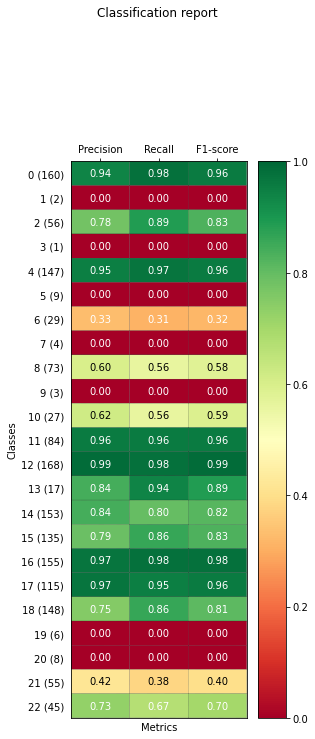

<Figure size 432x288 with 0 Axes>

In [134]:

plot_classification_report(classification_report(y_test, y_pred), 23, title='Classification report ', cmap='RdYlGn')
plt.figure().savefig('Classification report of VGG16+CapsNets on HyperKvasir.png')

## ROC-AUC Curve